In [43]:
#import the libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [45]:
#set the option to see all columns through head 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [46]:
#Start the analysis with the application data.csv
#import the application data into a data frame
df_app = pd.read_csv("application_data.csv")
df_app.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#insights- from head looking at the data
# days birth,days_employed,days_registration, id_publish,Days_last_phone_change have negative values- may need conversion to date field 
# Flag_***_**** - fields if the customer did provide info may be useful to identify  customer's interest
# Occupation type,Organization Type,region rating, OBS_30/60,DEF_30/60 ,AMT_REQ_CREDIT_BUREAU_* may be useful columns for default rate. Check
# REG_CITY_NOT_LIVE_CITY,Days_last_phone_change like cols - may point to fradulent behavior should be checked 
# Columns that are bank's operational columns and shouldn't have any bearance on the default rate - Weekday_appr_process_start,
# HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
# The columns related to Apartment specification seem redundant with APts_Avg, also seem like have lot of missing values, check and drop
#Flag_document_# - document type details not available, but check if any document missing has strong coorelation with default, if not drop the columns

In [47]:
#check the shape of the data frame #(307511, 122)
df_app.shape

(307511, 122)

In [48]:
#info on the data frame. Not much help as the number of columns are high and compete info not visible 
# there are floats, ints and a rest object types - which may need typecasting
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [49]:
df_app.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

Validate the insights noted from the head/tail using describe , empty values, NaN.
Firest Objective Remove any redundant columns before cleaning to save the effort of cleaning redundant cols

In [50]:
#Columns related to Apartment specification seem redundant with APts_Avg, also seem like have lot of missing values
df_app.APARTMENTS_AVG.isnull().sum() # 156k rows are null so roughly 50% of rows are blank. So this info is normalized one, 
df_app.NONLIVINGAPARTMENTS_AVG.isnull().sum()


213514

In [51]:
# as there are many columns with lot of null values, identfying and dropping those columns with more than 40-50% missing values
null_percentages = df_app.isnull().mean()
columns_with_high_nulls4 = null_percentages[null_percentages > 0.4].index
columns_with_high_nulls5= null_percentages[null_percentages > 0.5].index
print(list(set(columns_with_high_nulls4) - set(columns_with_high_nulls5)))

['YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'TOTALAREA_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'EMERGENCYSTATE_MODE']


In [52]:
#dropping those columns with more than 40% missing values as all these columns seem redundant
df_app = df_app.drop(columns_with_high_nulls4, axis=1)

In [53]:
df_app.shape

(307511, 73)

In [54]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# drop WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START as they are Banks operational colums no bearance on the default rate

df_app = df_app.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'], axis=1)

In [56]:
# check the flag columns if they are any use , if very less populated then drop them
df_app.FLAG_DOCUMENT_2.value_counts() # only 13 have provided 
df_app.FLAG_DOCUMENT_3.value_counts() #  218K have provided 
df_app.FLAG_DOCUMENT_4.value_counts() # only 25 have provided 
df_app.FLAG_DOCUMENT_5.value_counts() # only 4k have provided 
df_app.FLAG_DOCUMENT_6.value_counts() #  27k have provided 
df_app.FLAG_DOCUMENT_7.value_counts() # only 59 have provided  
df_app.FLAG_DOCUMENT_8.value_counts() #  25k have provided 
df_app.FLAG_DOCUMENT_9.value_counts() # only 1198 have provided 
df_app.FLAG_DOCUMENT_10.value_counts() # only 7 have provided 
df_app.FLAG_DOCUMENT_11.value_counts() # only 1204 have provided 
df_app.FLAG_DOCUMENT_12.value_counts() # only 2 have provided 
df_app.FLAG_DOCUMENT_13.value_counts() # only 1084 have provided 
df_app.FLAG_DOCUMENT_14.value_counts() # only 903 have provided 
df_app.FLAG_DOCUMENT_15.value_counts() # only 372 have provided 
df_app.FLAG_DOCUMENT_16.value_counts() # only 3053 have provided 
df_app.FLAG_DOCUMENT_17.value_counts() # only 82 have provided 
df_app.FLAG_DOCUMENT_18.value_counts() # only 2500 have provided 
df_app.FLAG_DOCUMENT_19.value_counts() # only 183 have provided 
df_app.FLAG_DOCUMENT_20.value_counts() # only 156 have provided
df_app.FLAG_DOCUMENT_21.value_counts() # only 103 have provided


FLAG_DOCUMENT_21
0    307408
1       103
Name: count, dtype: int64

In [57]:
# drop with flag document columns which very few have provided as those will not be hlepful
#drop columns FLAG_DOCUMENT_2, FLAG_DOCUMENT_4,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21

df_app=df_app.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_7','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],axis=1)

In [58]:
df_app.shape

(307511, 54)

In [59]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
# Remove the duplicate columns
# REG_CITY_NOT_LIVE_CITY  is dulicate of REG_REGION_NOT_LIVE_REGION
# REG_CITY_NOT_WORK_CITY - REG_REGION_NOT_WORK_REGION
# LIVE_CITY_NOT_WORK_CITY - LIVE_REGION_NOT_WORK_REGION
df_app = df_app.drop(['REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'], axis=1)

In [61]:
df_app.shape

(307511, 51)

In [62]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,0,0,0,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
#check the null values
df_app.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()
df_app.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()
df_app.AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()
df_app.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()
#all the credit bureau columns seem to have same data null data - 41519  check if they are duplicates 

41519

In [64]:
#Duplicate check of AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR
print(df_app['AMT_REQ_CREDIT_BUREAU_WEEK'].equals(df_app['AMT_REQ_CREDIT_BUREAU_DAY']))
print(df_app['AMT_REQ_CREDIT_BUREAU_HOUR'].equals(df_app['AMT_REQ_CREDIT_BUREAU_WEEK']))
print(df_app['AMT_REQ_CREDIT_BUREAU_HOUR'].equals(df_app['AMT_REQ_CREDIT_BUREAU_MON']))
print(df_app['AMT_REQ_CREDIT_BUREAU_DAY'].equals(df_app['AMT_REQ_CREDIT_BUREAU_QRT']))
print(df_app['AMT_REQ_CREDIT_BUREAU_HOUR'].equals(df_app['AMT_REQ_CREDIT_BUREAU_YEAR']))
#Confirmed they are not duplicates

False
False
False
False
False


In [65]:
# as Null count is same if same rows are Null for these four columns 
week_null = df_app[df_app['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull()].index.to_list()
hour_null = df_app[df_app['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull()].index.to_list()
day_null = df_app[df_app['AMT_REQ_CREDIT_BUREAU_DAY'].isnull()].index.to_list()
qtr_null = df_app[df_app['AMT_REQ_CREDIT_BUREAU_QRT'].isnull()].index.to_list()
yr_null = df_app[df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull()].index.to_list()
mon_null = df_app[df_app['AMT_REQ_CREDIT_BUREAU_MON'].isnull()].index.to_list()

print(week_null == hour_null == day_null == qtr_null == yr_null == mon_null)

True


In [66]:
#delete the rows where AMT_REQ_CREDIT_BUREAU_WEEK is null
df_app = df_app[df_app['AMT_REQ_CREDIT_BUREAU_WEEK'].notnull()]

In [67]:
#check 
df_app.AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()
# good 0 rows returned null rows deleted so these important columns can be used now 

0

In [68]:
df_app.TARGET.value_counts()
# target value impacted 4k rows deleted but we can use the credit bureau columns now to access their effectiveness


TARGET
0    245459
1     20533
Name: count, dtype: int64

In [69]:
null_cols = df_app.isnull().sum()
print(null_cols[null_cols > 0])
#df_null_cols = null_cols[null_cols > 0]

AMT_ANNUITY                    11
AMT_GOODS_PRICE               232
NAME_TYPE_SUITE              1183
OCCUPATION_TYPE             83169
CNT_FAM_MEMBERS                 1
EXT_SOURCE_2                  528
EXT_SOURCE_3                19446
OBS_30_CNT_SOCIAL_CIRCLE      851
DEF_30_CNT_SOCIAL_CIRCLE      851
OBS_60_CNT_SOCIAL_CIRCLE      851
DEF_60_CNT_SOCIAL_CIRCLE      851
dtype: int64


occupation type has 83169 null values but is an important variable, so it can't be dropped 

In [70]:
#dropping ext_source_3 column as high number of null values and imputing such high number with median will be wrong 
df_app = df_app.drop(['EXT_SOURCE_3'], axis=1)

In [71]:
# NAME_TYPE_SUITE appears to be a trivial varibale so dropping it, categorical variable 1183 null values 
df_app = df_app.drop(['NAME_TYPE_SUITE'], axis=1)

In [72]:
#Annuity is usually used in insurance , not sure of the relevance in loans and 

In [73]:
df_app.shape

(265992, 49)

In [74]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,0,0,0,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,-2536.0,1,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [75]:
# imputing the rest of columns with null values with median   
df_app['AMT_ANNUITY'].fillna(df_app['AMT_ANNUITY'].median(), inplace=True)
df_app['AMT_GOODS_PRICE'].fillna(df_app['AMT_GOODS_PRICE'].median(), inplace=True)
df_app['CNT_FAM_MEMBERS'].fillna(df_app['CNT_FAM_MEMBERS'].median(), inplace=True)
df_app['EXT_SOURCE_2'].fillna(df_app['EXT_SOURCE_2'].median(), inplace=True)
df_app['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df_app['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
df_app['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df_app['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
df_app['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df_app['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)
df_app['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df_app['DEF_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)


In [76]:
#check the datatypes of pending columns 
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265992 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   265992 non-null  int64  
 1   TARGET                       265992 non-null  int64  
 2   NAME_CONTRACT_TYPE           265992 non-null  object 
 3   CODE_GENDER                  265992 non-null  object 
 4   FLAG_OWN_CAR                 265992 non-null  object 
 5   FLAG_OWN_REALTY              265992 non-null  object 
 6   CNT_CHILDREN                 265992 non-null  int64  
 7   AMT_INCOME_TOTAL             265992 non-null  float64
 8   AMT_CREDIT                   265992 non-null  float64
 9   AMT_ANNUITY                  265992 non-null  float64
 10  AMT_GOODS_PRICE              265992 non-null  float64
 11  NAME_INCOME_TYPE             265992 non-null  object 
 12  NAME_EDUCATION_TYPE          265992 non-null  object 
 13  NAME

In [77]:
#DAYS_BIRTH as per defination is age in days at the time of appplication but is negative makes no sense
#  it might be number of days from date of reference (like other columns) or as per defincation age in days just the abs value should be takem
# Checking the median and mean it seems like abs value has to be considered as no point a person will apply for loan  44 yrs, date of processing 
df_app['DAYS_BIRTH'].describe()

count    265992.000000
mean     -16115.122680
std        4309.230436
min      -25201.000000
25%      -19713.000000
50%      -15810.000000
75%      -12568.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [78]:
#creating a vew column with age in years derived from DAYS_BIRTH
df_app['AGE_YEARS'] = np.floor(-df_app['DAYS_BIRTH'] / 365.25)

In [79]:
#dropping DAYS_BIRTH column
df_app = df_app.drop(['DAYS_BIRTH'], axis=1)

In [80]:
df_app.shape

(265992, 49)

UNIVARIATE ANALYSIS 


In [81]:
#plot if amt_income_total has any outliers 
df_app['AMT_INCOME_TOTAL'].describe()

count    2.659920e+05
mean     1.712756e+05
std      2.483851e+05
min      2.610000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

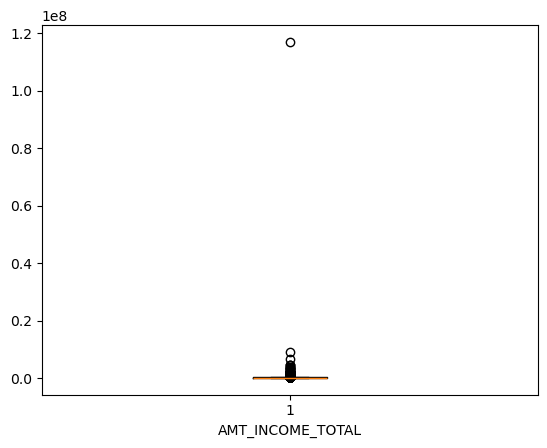

In [82]:
plt.boxplot(df_app['AMT_INCOME_TOTAL'])
plt.xlabel("AMT_INCOME_TOTAL")
plt.show()

In [83]:
df_app['AMT_INCOME_TOTAL'].max()

117000000.0

In [84]:
#remove the outlier 
df_app=df_app[df_app['AMT_INCOME_TOTAL']< 117000000]

In [85]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,0,0,0,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,54.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,-2536.0,1,0,0,0.0,0.0,0.0,0.0,1.0,1.0,46.0


In [86]:
#correlation matrix
correlation_matrix = df_app.select_dtypes(include="number").corr()
high_corr_matrix = correlation_matrix[(correlation_matrix >= 0.8) | (correlation_matrix <= -0.8)]
print(high_corr_matrix)   

                             SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                          1.0     NaN           NaN   
TARGET                              NaN     1.0           NaN   
CNT_CHILDREN                        NaN     NaN      1.000000   
AMT_INCOME_TOTAL                    NaN     NaN           NaN   
AMT_CREDIT                          NaN     NaN           NaN   
AMT_ANNUITY                         NaN     NaN           NaN   
AMT_GOODS_PRICE                     NaN     NaN           NaN   
REGION_POPULATION_RELATIVE          NaN     NaN           NaN   
DAYS_EMPLOYED                       NaN     NaN           NaN   
DAYS_REGISTRATION                   NaN     NaN           NaN   
DAYS_ID_PUBLISH                     NaN     NaN           NaN   
FLAG_MOBIL                          NaN     NaN           NaN   
FLAG_EMP_PHONE                      NaN     NaN           NaN   
FLAG_WORK_PHONE                     NaN     NaN           NaN   
FLAG_CONT_MOBILE         

high corelated columns - check if any addtional relationship can be figured out 
CNT_CHILDREN is highly correlated with CNT_FAM_MEMBERS - expected 
AMT_CREDIT is highly correlated with AMT_GOODS_PRICE - expected loan amount dependent on underlying goods
FLAG_EMP_PHONE is high negative coorelation with DAYS_EMPLOYED - expected
REGION_RATING_CLIENT_W_CITY highly correlated with REGION_RATING_CLIENT - expected nearly same 
LIVE_REGION_NOT_WORK_REGION highly correlated with REG_REGION_NOT_WORK_REGION  - expected
OBS_30_CNT_SOCIAL_CIRCLE highly correlated with OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE highly correlated with    DEF_30_CNT_SOCIAL_CIRCLE
Some of the correlated columns can be dropped as they are highly correlated or anyone of them can be considered for EDA

MULTI VARIATE ANALYSIS for TARGET 
As TARGET is a categorical varibale (0= No default/ 1= default) 
a. CATEGORICAL - NUMERICAL ANALYSIS
b. CATEGORICAL - CATEGORICAL ANALYSIS 

CATEGORICAL - NUMERICAL ANALYSIS  VARIABLES (boxplot/ group by and percentile)
Numerical columns in the dataset are -AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,
REGION_POPULATION_RELATIVE,AGE_YEARS,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,DAYS_LAST_PHONE_CHANGE	

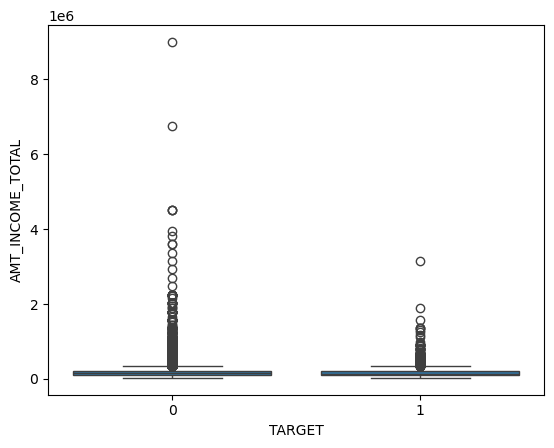

In [87]:
sns.boxplot(data=df_app,x="TARGET", y="AMT_INCOME_TOTAL")
plt.show()

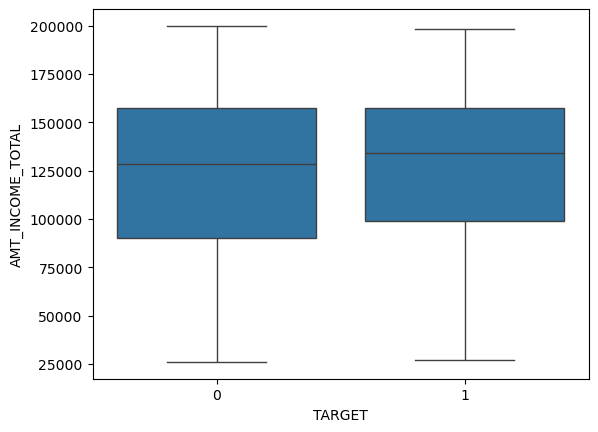

In [88]:
sns.boxplot(data=df_app.query("AMT_INCOME_TOTAL < 200000"), x="TARGET", y="AMT_INCOME_TOTAL")
plt.show()
#Insight : AMT_INCOME_TOTAL median and quartiles are same for TARGET=0 and TARGET=1 , so income is not a driver for default 

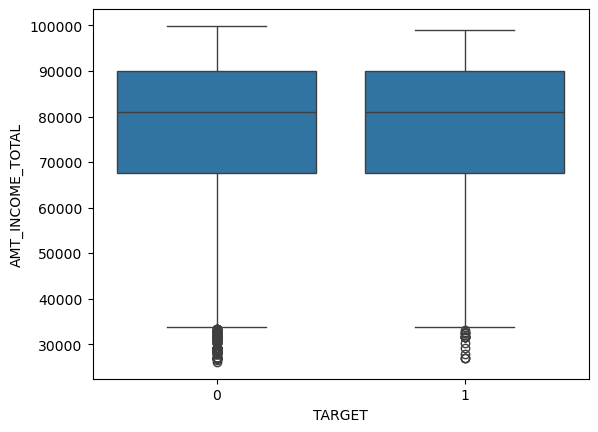

In [89]:
sns.boxplot(data=df_app.query("AMT_INCOME_TOTAL < 100000"), x="TARGET", y="AMT_INCOME_TOTAL")
plt.show()

In [90]:
df_app.groupby(['TARGET'])['AMT_INCOME_TOTAL'].describe()
# same conclusion as box plot no difference in median and quartiles

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,245459.0,171378.154850,102904.992236,26100.0,112500.0,157500.0,202500.0,9000000.0
1,20532.0,164360.128141,88597.103419,27000.0,112500.0,144000.0,202500.0,3150000.0


In [91]:
df_app.groupby(['TARGET'])['AMT_CREDIT'].describe()
# same conclusion as box plot no difference in median and quartiles

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,245459.0,609701.183399,409085.693256,45000.0,270000.0,521280.0,819432.0,4050000.0
1,20532.0,565906.861631,347122.972402,45000.0,288873.0,503676.0,755190.0,3020760.0


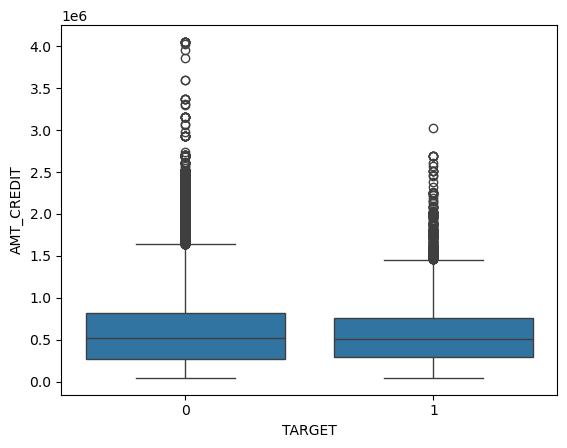

In [92]:
sns.boxplot(data=df_app,x="TARGET", y="AMT_CREDIT")
plt.show()
# not much of an impact  as box plot no difference in median and quartiles

In [93]:
df_app.groupby(['TARGET'])['AMT_GOODS_PRICE'].describe()
# same conclusion as box plot no difference in median and quartiles

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,245459.0,549046.968341,375580.716910,40500.0,238500.0,454500.0,688500.0,4050000.0
1,20532.0,496038.994813,311434.839394,45000.0,247500.0,450000.0,675000.0,2700000.0


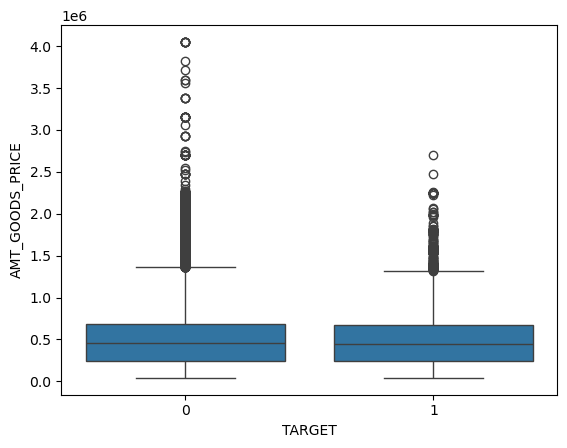

In [94]:
sns.boxplot(data=df_app,x="TARGET", y="AMT_GOODS_PRICE")
plt.show()

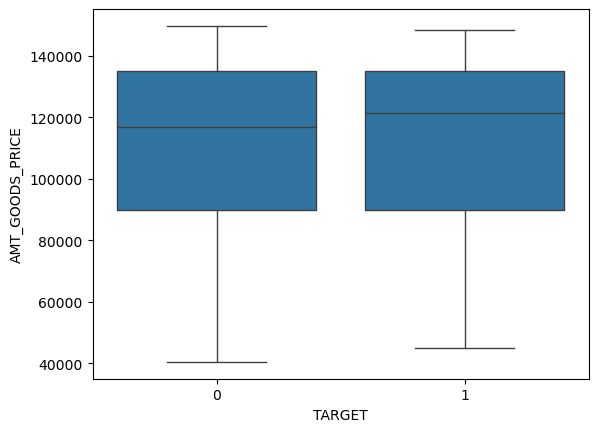

In [95]:
sns.boxplot(data=df_app.query("AMT_GOODS_PRICE < 150000"),x="TARGET", y="AMT_GOODS_PRICE")
plt.show()

In [96]:
df_app.groupby(['TARGET'])['REGION_POPULATION_RELATIVE'].describe()

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,245459.0,0.020974,0.013889,0.000290,0.010006,0.018850,0.028663,0.072508
1,20532.0,0.019198,0.011782,0.000533,0.009657,0.018801,0.025164,0.072508


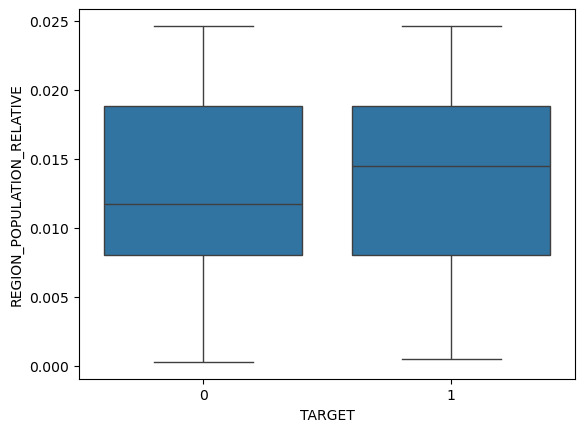

In [97]:
sns.boxplot(data=df_app.query("REGION_POPULATION_RELATIVE < 0.025"),x="TARGET", y="REGION_POPULATION_RELATIVE")
plt.show()
# towards the lower end of REGION_POPULATION_RELATIVE there is a small difference on defaults  

In [98]:
df_app.groupby(['TARGET'])['AGE_YEARS'].describe()

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,245459.0,43.880045,11.796952,20.0,34.0,43.0,54.0,68.0
1,20532.0,40.496152,11.336706,21.0,31.0,39.0,49.0,68.0


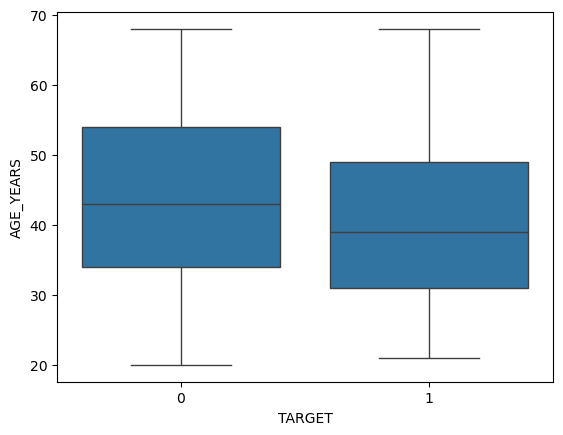

In [99]:
sns.boxplot(data=df_app,x="TARGET", y="AGE_YEARS")
plt.show()
# Age plays some role median and quartiles all point that lower age are more likely to default
# if we divide the age in bands may be we can get better input 

<function matplotlib.pyplot.show(close=None, block=None)>

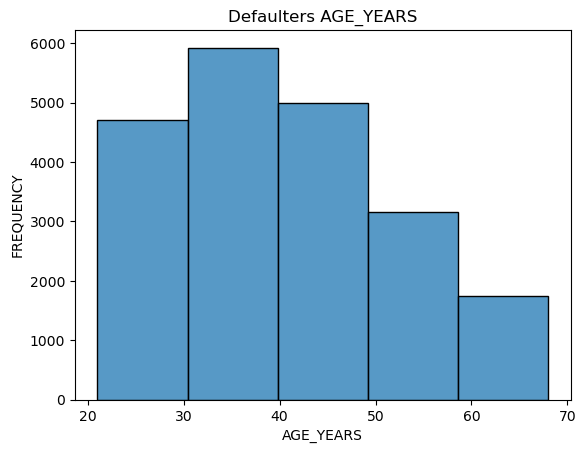

In [100]:
sns.histplot(df_app.query("TARGET == 1")["AGE_YEARS"], bins=5)
plt.xlabel("AGE_YEARS")
plt.ylabel('FREQUENCY')
plt.title(f'Defaulters AGE_YEARS')
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

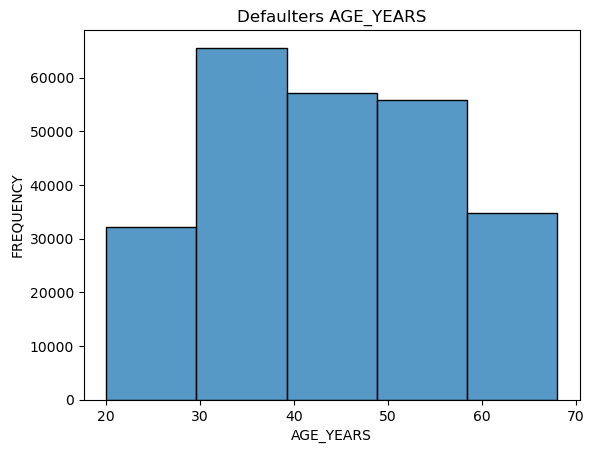

In [101]:
sns.histplot(df_app.query("TARGET == 0")["AGE_YEARS"], bins=5)
plt.xlabel("AGE_YEARS")
plt.ylabel('FREQUENCY')
plt.title(f'Defaulters AGE_YEARS')
plt.show

# 50 -70  seems like a safe though percentage required for better analyssi TO DO 

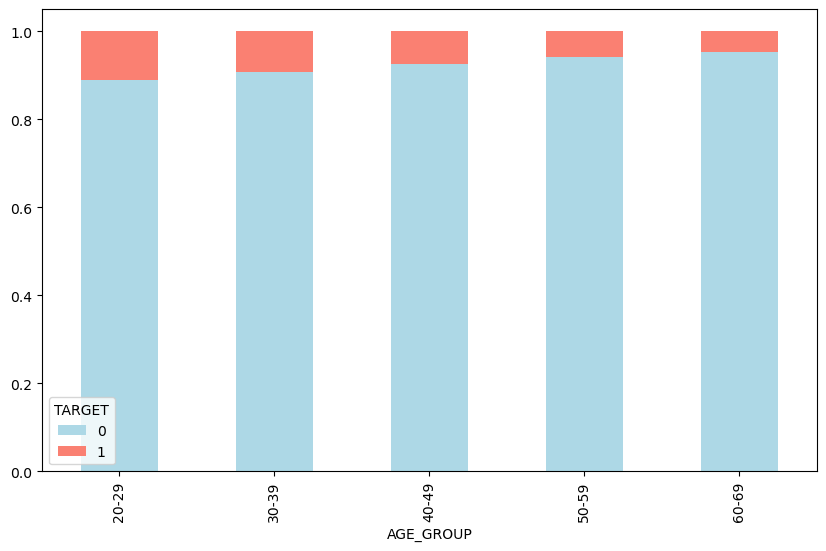

In [102]:
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69'] # create labels for bins
df_app['AGE_GROUP'] = pd.cut(df_app['AGE_YEARS'], bins=bins, labels=labels, right=False)
age_group_counts = df_app.groupby('AGE_GROUP')['TARGET'].value_counts().unstack(fill_value=0)
#print(age_group_counts)

#age_group_counts.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], figsize=(10, 6))
# Calculate percentages for each status within each age group
age_group_percent = age_group_counts.div(age_group_counts.sum(axis=1), axis=0)
age_group_percent.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'], figsize=(10, 6))
plt.show()

In [103]:
df_app.groupby(['TARGET'])["EXT_SOURCE_2"].describe()

,count,mean,std,min,25%,50%,75%,max
TARGET,,,,,,,,
0,245459.0,0.526184,0.184865,0.000001,0.415658,0.576032,0.668563,0.85500
1,20532.0,0.417585,0.212863,0.000005,0.245526,0.449564,0.598858,0.81187


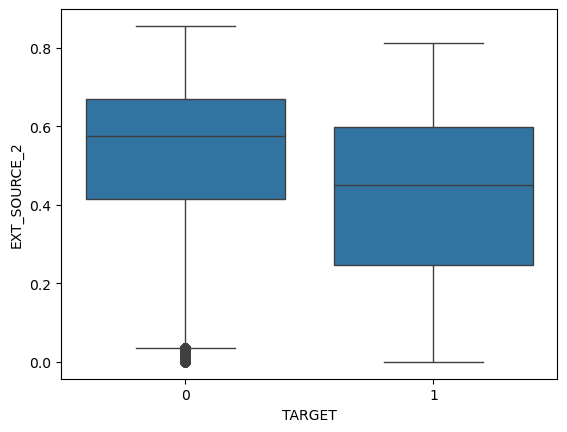

In [104]:
sns.boxplot(data=df_app,x="TARGET", y="EXT_SOURCE_2")
plt.show()

# Seems to have major impact on the Target column 

In [105]:
def p75(x):
    return np.quantile(x, 0.75)
df_app.groupby(['TARGET'])["EXT_SOURCE_2"].aggregate(['mean', 'median', p75])

#EXT_SOURCE_2 lower values have less default

,mean,median,p75
TARGET,,,
0,0.526184,0.576032,0.668563
1,0.417585,0.449564,0.598858


Multi variate Analysis
Categorical - Categorical Analysis 

NAME_CONTRACT_TYPE , NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE.
ORGANIZATION_TYPE

In [106]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,20-29
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,40-49
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,50-59
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,0,0,0,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,54.0,50-59
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,-2536.0,1,0,0,0.0,0.0,0.0,0.0,1.0,1.0,46.0,40-49


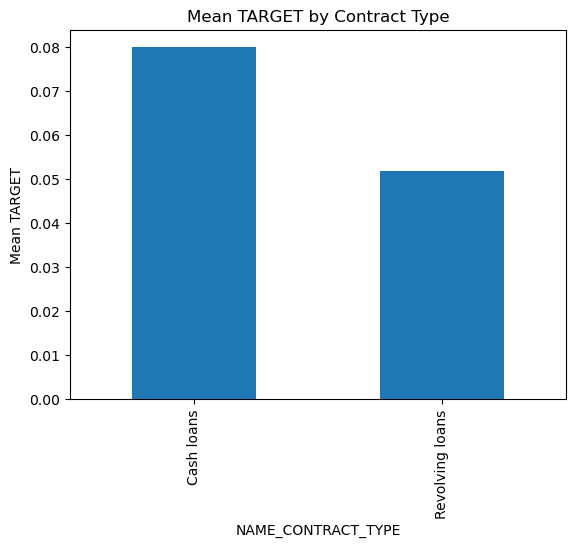

In [107]:
df_app.groupby("NAME_CONTRACT_TYPE")["TARGET"].mean().plot.bar()
plt.title("Mean TARGET by Contract Type")
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("Mean TARGET")
plt.show()

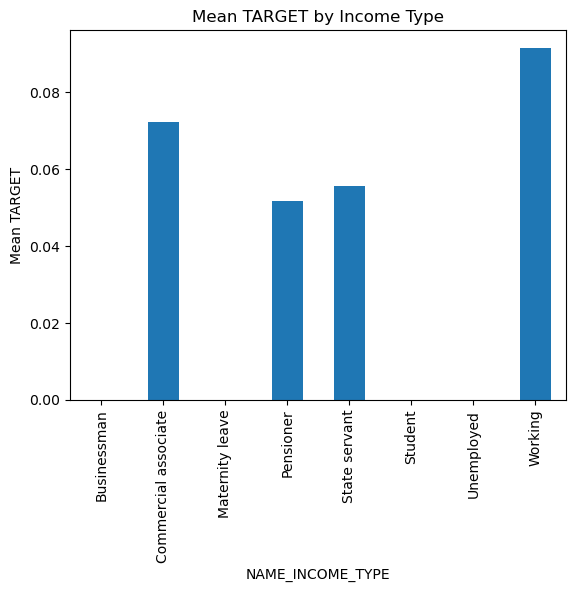

In [108]:
df_app.groupby("NAME_INCOME_TYPE")["TARGET"].mean().plot.bar()
plt.title("Mean TARGET by Income Type")
plt.xlabel("NAME_INCOME_TYPE")
plt.ylabel("Mean TARGET")
plt.show()

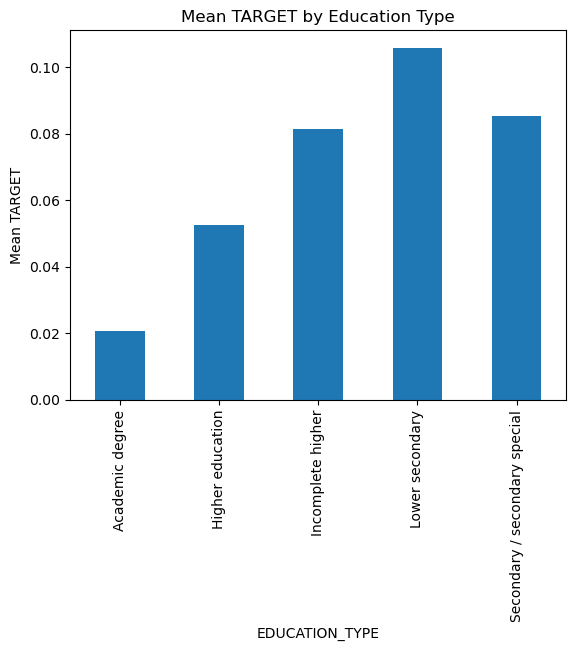

In [109]:
df_app.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean().plot.bar()
plt.title("Mean TARGET by Education Type")
plt.xlabel("EDUCATION_TYPE")
plt.ylabel("Mean TARGET")
plt.show()

NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE.
ORGANIZATION_TYPE

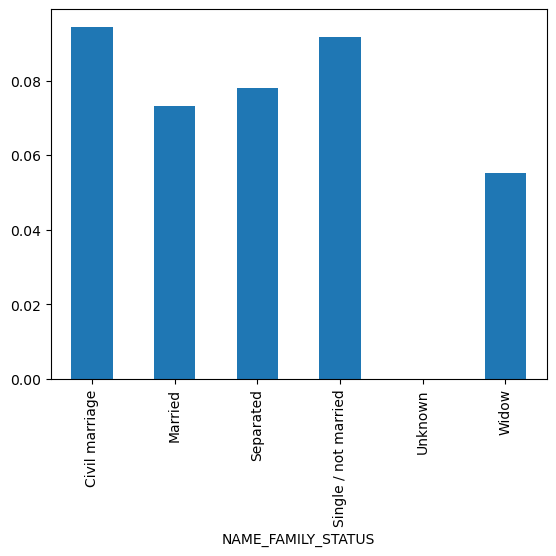

In [110]:
df_app.groupby("NAME_FAMILY_STATUS")["TARGET"].mean().plot.bar()
plt.show()

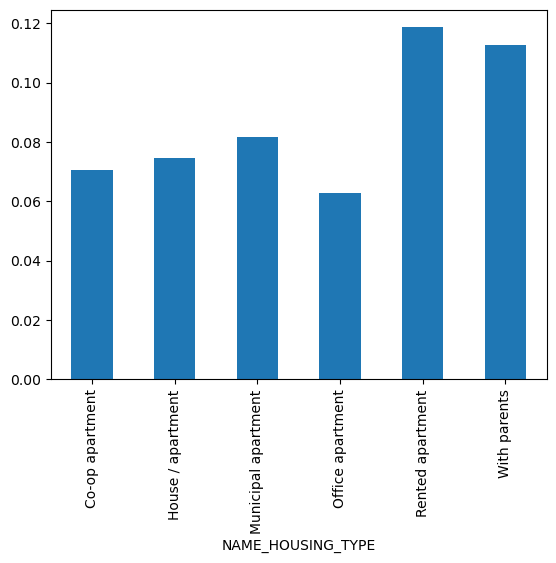

In [111]:
df_app.groupby("NAME_HOUSING_TYPE")["TARGET"].mean().plot.bar()
plt.show()

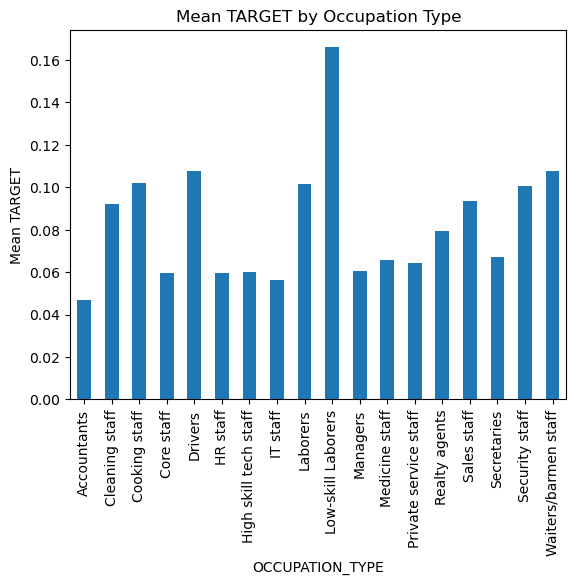

In [112]:
df_app.groupby("OCCUPATION_TYPE")["TARGET"].mean().plot.bar()
plt.title("Mean TARGET by Occupation Type")
plt.xlabel("OCCUPATION_TYPE")
plt.ylabel("Mean TARGET")
plt.show()

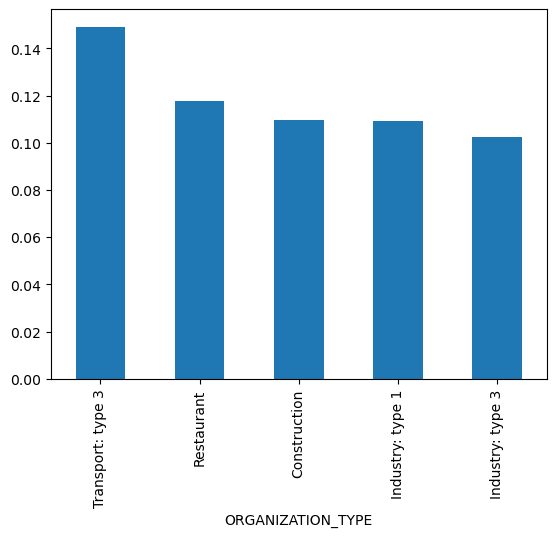

In [113]:
df_app.groupby("ORGANIZATION_TYPE")["TARGET"].mean().sort_values(ascending=False).head(5).plot.bar()
plt.show()

In [114]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,20-29
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,40-49
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,50-59
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,0,0,0,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,54.0,50-59
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,0,0,0,Other,0.354225,0.0,0.0,0.0,0.0,-2536.0,1,0,0,0.0,0.0,0.0,0.0,1.0,1.0,46.0,40-49


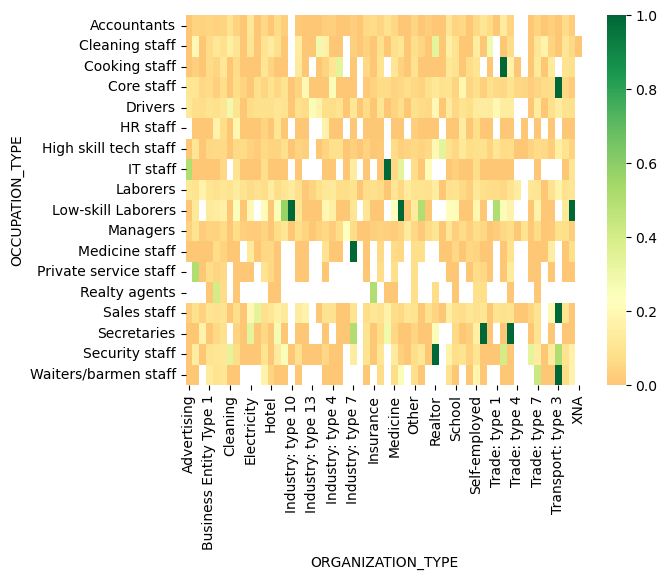

In [115]:
# to check if all low skill workers have higher propensity to default or its based on some organization type
res =pd.pivot_table(data=df_app, index='OCCUPATION_TYPE',columns='ORGANIZATION_TYPE', values='TARGET', aggfunc='mean')
sns.heatmap(res, cmap="RdYlGn", center= 0.2308)
plt.show()

ANALYSIS OF PREVIOUS APPLICATION DATASET

In [116]:
df_prev_app = pd.read_csv("previous_application.csv")
df_prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df_prev_app.shape

(1670214, 37)

Analysis of the columns from head and tail
NAME_CONTRACT_TYPE, AMT_ANNUITY,
RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_TYPE_SUITE - lot of NaN 
NAME_CASH_LOAN_PURPOSE	NAME_CONTRACT_STATUS,CODE_REJECT_REASON,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,NAME_SELLER_INDUSTRY check if the categorical values have any bearance on the default rate of new app
PRODUCT_COMBINATION - is combination of mutiple columns
DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_FIRST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION - are operational columns 
NFLAG_INSURED_ON_APPROVAL - seems imp ,check if it can be used as a predictor variable

In [118]:
df_prev_app.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [119]:
#identifting columns with more than 40% null values
null_percentages = df_prev_app.isnull().mean()
columns_morenullsthan_40= null_percentages[null_percentages > 0.4].index
print(columns_morenullsthan_40)

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [120]:
# drop columns with more than 40% null values
df_prev_app = df_prev_app.drop(columns_morenullsthan_40, axis=1)
df_prev_app.shape

(1670214, 26)

In [121]:
#AMT_ANNUITY has 372235 nulls. Annuity is an insurance field. Loan Annuity doesn't make much sense. Dropping the column

df_prev_app = df_prev_app.drop(['AMT_ANNUITY'], axis=1) 
df_prev_app.shape

(1670214, 25)

In [122]:
df_prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [123]:
#WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START are operational columns , irrelvant to default rate
# dropping the columns

df_prev_app = df_prev_app.drop(['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'], axis=1)



In [124]:
#CNT_PAYMENT has372230 missing values. Update with mean/median will not be correct for a loan specific field hence dropping it 
df_prev_app = df_prev_app.drop(['CNT_PAYMENT'], axis=1)

In [125]:
df_prev_app.shape

(1670214, 22)

In [126]:
#impute amts_goods_price with mean
df_prev_app['AMT_GOODS_PRICE'] = df_prev_app['AMT_GOODS_PRICE'].fillna(df_prev_app['AMT_GOODS_PRICE'].mean())


In [127]:
df_prev_app.shape

(1670214, 22)

In [128]:
#correlation matrix analysis of numeric variables
correlation_matrix2 = df_prev_app.select_dtypes(include="number").corr()
high_corr_matrix2 = correlation_matrix[(correlation_matrix2 >= 0.8) | (correlation_matrix2 <= -0.8)]
print(high_corr_matrix2)

                             SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                          1.0     NaN           NaN   
TARGET                              NaN     NaN           NaN   
CNT_CHILDREN                        NaN     NaN           NaN   
AMT_INCOME_TOTAL                    NaN     NaN           NaN   
AMT_CREDIT                          NaN     NaN           NaN   
AMT_ANNUITY                         NaN     NaN           NaN   
AMT_GOODS_PRICE                     NaN     NaN           NaN   
REGION_POPULATION_RELATIVE          NaN     NaN           NaN   
DAYS_EMPLOYED                       NaN     NaN           NaN   
DAYS_REGISTRATION                   NaN     NaN           NaN   
DAYS_ID_PUBLISH                     NaN     NaN           NaN   
FLAG_MOBIL                          NaN     NaN           NaN   
FLAG_EMP_PHONE                      NaN     NaN           NaN   
FLAG_WORK_PHONE                     NaN     NaN           NaN   
FLAG_CONT_MOBILE         

In [129]:
#merging the two dataframes on SK_ID_CURR
df_app = df_app.merge(df_prev_app, on='SK_ID_CURR', how='left')


In [130]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,20-29,1038818.0,Consumer loans,179055.0,179055.0,179055.0,Y,1.0,XAP,Approved,-606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,40-49,1810518.0,Cash loans,900000.0,1035882.0,900000.0,Y,1.0,XNA,Approved,-746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,40-49,2636178.0,Consumer loans,337500.0,348637.5,337500.0,Y,1.0,XAP,Approved,-828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,40-49,2396755.0,Consumer loans,68809.5,68053.5,68809.5,Y,1.0,XAP,Approved,-2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,50-59,1564014.0,Consumer loans,24282.0,20106.0,24282.0,Y,1.0,XAP,Approved,-815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,middle,POS mobile without interest


In [131]:
df_app.NAME_CLIENT_TYPE.value_counts()

NAME_CLIENT_TYPE
Repeater     923454
New          222068
Refreshed    103185
XNA            1364
Name: count, dtype: int64

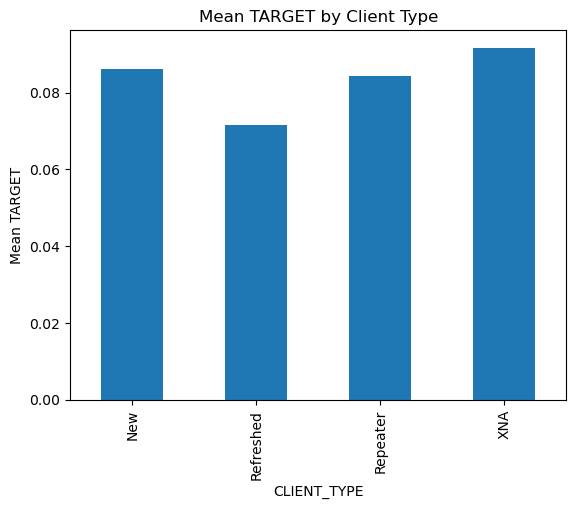

In [132]:
#check the relationship between target and NAME_CLIENT_TYPE two categorical variables
df_app.groupby("NAME_CLIENT_TYPE")["TARGET"].mean().plot.bar()
plt.title("Mean TARGET by Client Type")
plt.xlabel("CLIENT_TYPE")
plt.ylabel("Mean TARGET")
plt.show()
# No major impact on the Target column

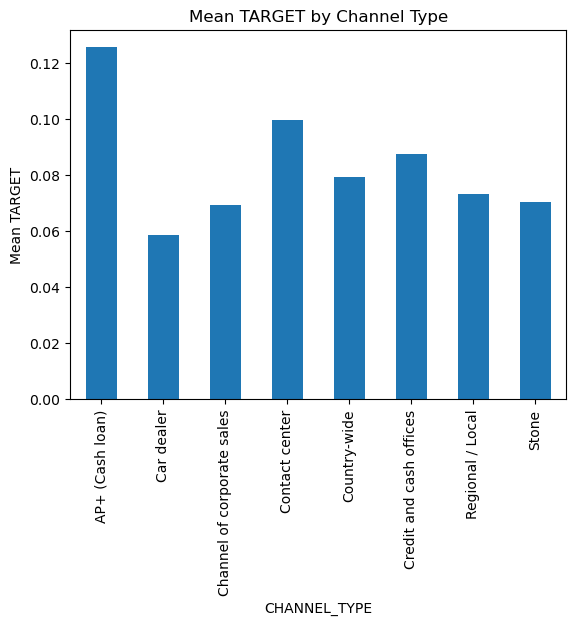

In [133]:
#CHANNEL_TYPE and Target 
df_app.groupby("CHANNEL_TYPE")["TARGET"].mean().plot.bar()
plt.title("Mean TARGET by Channel Type")
plt.xlabel("CHANNEL_TYPE")
plt.ylabel("Mean TARGET")
plt.show()
# AP+ Cashloan channel has highest default rate. But the mean is 0.12 so it is not a major driver for default

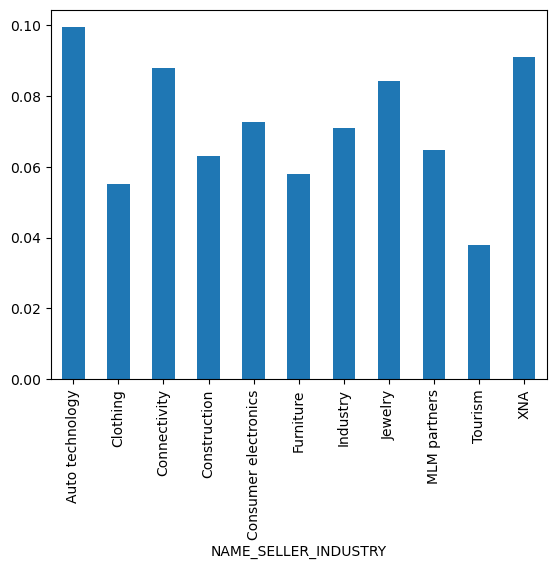

In [134]:
#NAME_SELLER_INDUSTRY and TARGET 
df_app.groupby("NAME_SELLER_INDUSTRY")["TARGET"].mean().plot.bar()
plt.show()

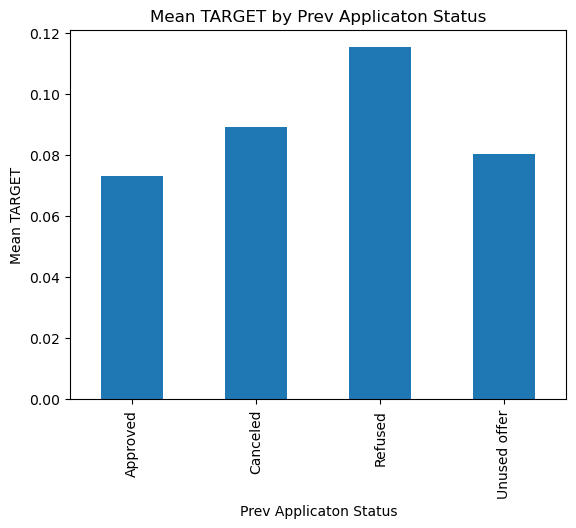

In [135]:
# was there any customer whose application was rejected and he deaulted in new application NAME_CONTRACT_STATUS
df_app.groupby("NAME_CONTRACT_STATUS")["TARGET"].mean().plot.bar()
plt.title("Mean TARGET by Prev Applicaton Status")
plt.xlabel("Prev Applicaton Status")
plt.ylabel("Mean TARGET")
plt.show()
#Of the other customer which were refused previous applicaiton have defaulted more in new application

In [136]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.0,20-29,1038818.0,Consumer loans,179055.0,179055.0,179055.0,Y,1.0,XAP,Approved,-606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,40-49,1810518.0,Cash loans,900000.0,1035882.0,900000.0,Y,1.0,XNA,Approved,-746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,40-49,2636178.0,Consumer loans,337500.0,348637.5,337500.0,Y,1.0,XAP,Approved,-828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,40-49,2396755.0,Consumer loans,68809.5,68053.5,68809.5,Y,1.0,XAP,Approved,-2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,50-59,1564014.0,Consumer loans,24282.0,20106.0,24282.0,Y,1.0,XAP,Approved,-815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,middle,POS mobile without interest


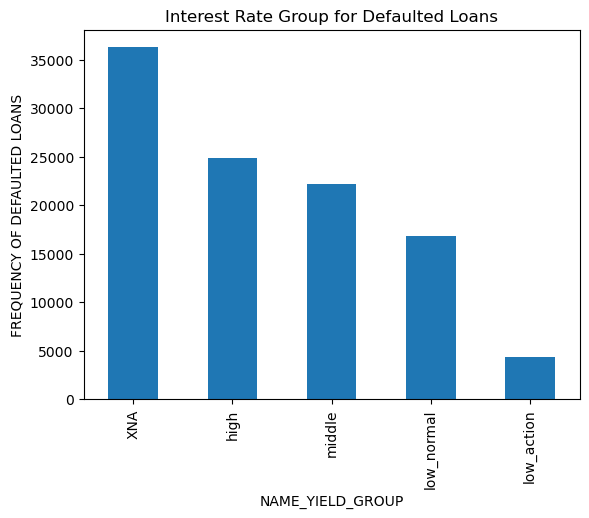

In [137]:
# Was higher intrest rate charged for risker categories as per the prvious analysis
df_app.query("TARGET == 1")["NAME_YIELD_GROUP"].value_counts().plot.bar()
plt.title("Interest Rate Group for Defaulted Loans")
plt.xlabel("NAME_YIELD_GROUP")
plt.ylabel("FREQUENCY OF DEFAULTED LOANS")
plt.show()
# Most of the defaulted loans are in XNA yield group bank shoud check if intrest rate as per the risk of default 


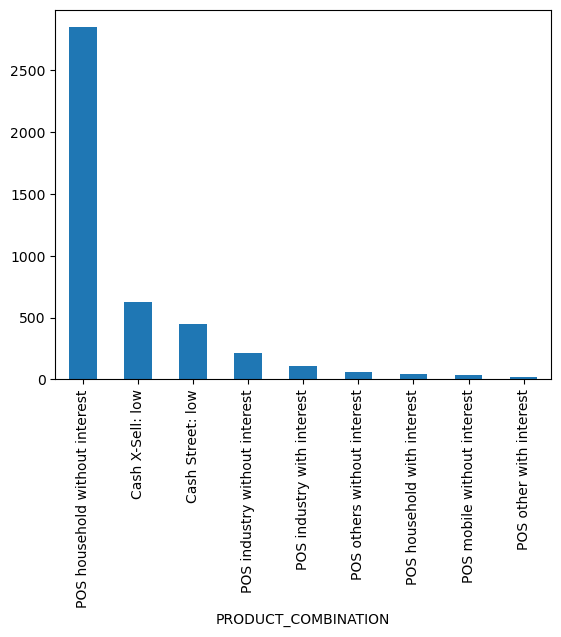

In [138]:
#try to figure which product combination bank is getting risk return trade off wrong assuming low_action is lowest yield 
df_app.query("TARGET == 1 and NAME_YIELD_GROUP== 'low_action'")["PRODUCT_COMBINATION"].value_counts().plot.bar()
plt.show()